# Validity of using prescription records to identify patient comorbidities
## Analysis of dementia
### Sensitivity analysis - dementia code at any time 

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|HDRUK code list|
|drug codes|bnf selection|
|sql date|28.05.2025|
|sql code|dementiaselection_fullFU_20250528.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [ ]:
odbc load, exec("select * from [dementia_425000_fullFU_20250528") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)

/* different age groups! */
egen agecat = cut(age), at(0,70,90,120)
label def agecat_lab 0 "Young" 70 "0Middle" 90 "Elderly" 120 "weird"
label values agecat agecat_lab

egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab

replace bnf_code = "Drugs for dementia" if bnf_code== "041100"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"


encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

/* put Wales and missing into NORTH WEST */
replace region_name = "NORTH WEST COMMISSIONING REGION" if strlen(region_name)<6

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)


(3,102 missing values generated)
(3,102 real changes made)
(4,582 missing values generated)
(4,582 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str18
(3,078 real changes made)
(23 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)
(3,996 real changes made)


(bin=19, start=16, width=5)


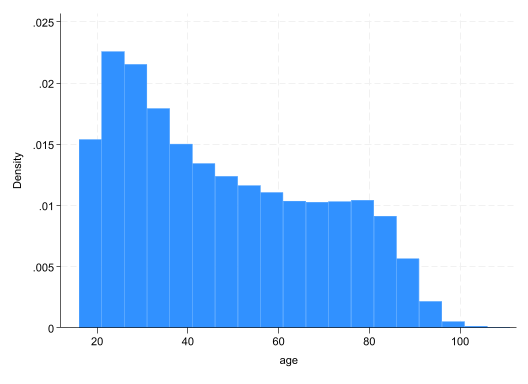

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +---------------------------------------------------------------------------------------------------------------------------------
> -------------------------+
  | description                                                                                                                     
>  Freq.   Percent     %<= |
  |---------------------------------------------------------------------------------------------------------------------------------
> -------------------------|
  | Dementia care plan reviewed (situation)                                                                                         
>    705     15.39   15.39 |
  | Dementia                                                                                                                        
>    518     11.31   26.69 |
  | Alzheimer's disease                                                                                                             
>    507     11.07   37.76 |
  | Review of dementia adva

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +----------------------------------------------+
  |           bnf_code   Freq.   Percent     %<= |
  |----------------------------------------------|
  | Drugs for dementia    3078     99.23   99.23 |
  |      Other/unknown      23      0.74   99.97 |
  +----------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,922      2,660 |     4,582 
    Normal |     1,180    419,238 |   420,418 
-----------+----------------------+----------
     Total |     3,102    421,898 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.0%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.9%     40.5%     43.4%
Specificity                      Pr(-|N)     99.7%     99.7%     99.7%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    149.45    139.